In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Temperatur Modell

In [3]:
class Temperature:
    
    days = 365
    
    def __init__(self, hot_year: bool = False, temp_var: int = 2) -> None:
        self.hot_year = hot_year
        self.temp_var = temp_var
        
    def calculate_temperature(self) -> np.ndarray:
        offset = 15 if self.hot_year else 11
        days = np.arange(1, 366)
        temps = 1 + 15 * np.sin(2 * np.pi * (days - 92) / 365) + np.random.uniform(-self.temp_var, self.temp_var, 365) + offset
        return temps
    

## Kunden Modell

In [8]:
class EisdielenGeschäft:

    def __init__(self, temperaturen: np.ndarray, fixkosten_pro_tag: int = 100, umsatz_temperatur_faktor: float = 0.5,
                 variable_kosten_pro_kunde: float = 0.5, kunden_temperatur_faktor: int = 5,
                 basis_temperatur: list = [10, 15],kunden_basis: list = [50, 60], umsatz_pro_kunde: list = [3, 5]) -> None:
        
        self.temperaturen = temperaturen
        self.fixkosten_pro_tag = fixkosten_pro_tag
        self.umsatz_temperatur_faktor = umsatz_temperatur_faktor
        self.variable_kosten_pro_kunde = variable_kosten_pro_kunde
        self.kunden_temperatur_faktor = kunden_temperatur_faktor
        self.basis_temperatur = basis_temperatur
        self.kunden_basis = kunden_basis
        self.umsatz_pro_kunde = umsatz_pro_kunde
        
        
    def run_modell(self) -> pd.DataFrame:
        # zufällige Werte für die Parameter für das Modell zum Start der Simulation
        basis_temperatur = np.random.randint(self.basis_temperatur[0], self.basis_temperatur[1])
        kunden_basis = np.random.randint(self.kunden_basis[0], self.kunden_basis[1])
        umsatz_pro_kunde = np.random.uniform(self.umsatz_pro_kunde[0], self.umsatz_pro_kunde[1])
        
        tage_im_jahr = len(self.temperaturen)
        kunden_temperatur_faktor = self.kunden_temperatur_faktor
        fixkosten_pro_tag = self.fixkosten_pro_tag
        umsatz_temperatur_faktor = self.umsatz_temperatur_faktor
        variable_kosten_pro_kunde = self.variable_kosten_pro_kunde
        
        # berechnungen
        kundenanzahl = kunden_basis + (self.temperaturen - basis_temperatur) * kunden_temperatur_faktor
        kundenanzahl = np.maximum(kundenanzahl, 0) # negative werte auf 0 setzen
        umsatz_pro_kunde = umsatz_pro_kunde + (self.temperaturen - basis_temperatur) * umsatz_temperatur_faktor
        gesamt_umsatz = kundenanzahl * umsatz_pro_kunde
        gesamt_kosten = fixkosten_pro_tag * np.ones(tage_im_jahr) + variable_kosten_pro_kunde * kundenanzahl

        profit = gesamt_umsatz - gesamt_kosten
        
        
        # Ergebnisse in einem DataFrame speichern
        ergebnisse = pd.DataFrame({
            'Tag': np.arange(1, tage_im_jahr + 1),
            'Temperatur': self.temperaturen,
            'Kundenanzahl': kundenanzahl,
            'UmsatzProKunde': umsatz_pro_kunde,
            'Gesamtumsatz': gesamt_umsatz,
            'Gesamtkosten': gesamt_kosten,
            'Profit/Loss': profit
        })

        return ergebnisse


## MC Simulation

Durchschnittlicher Profit [€]:  177276.18
Durchschnittlicher Umsatz [€]:  225972.08


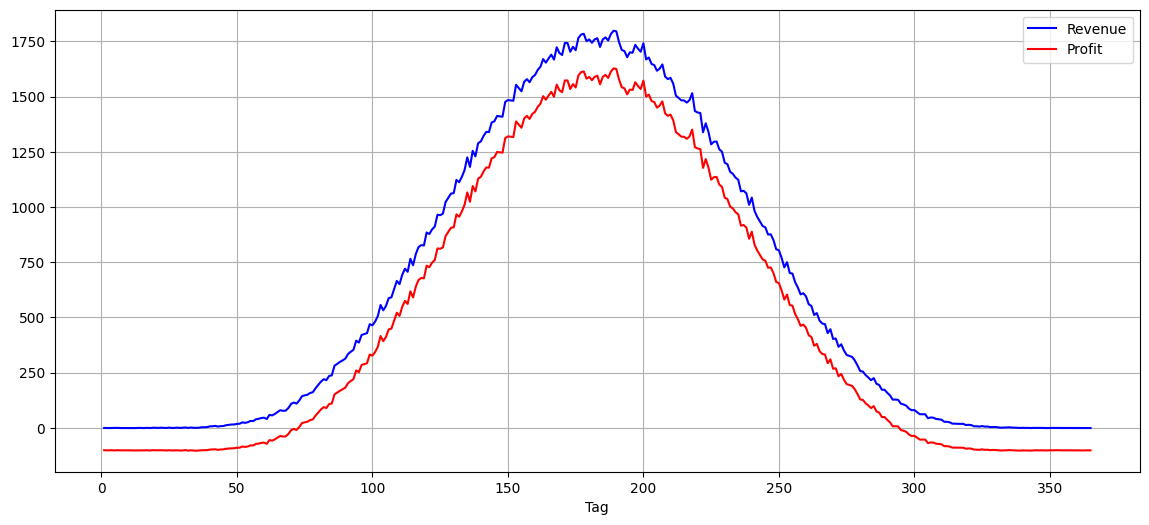

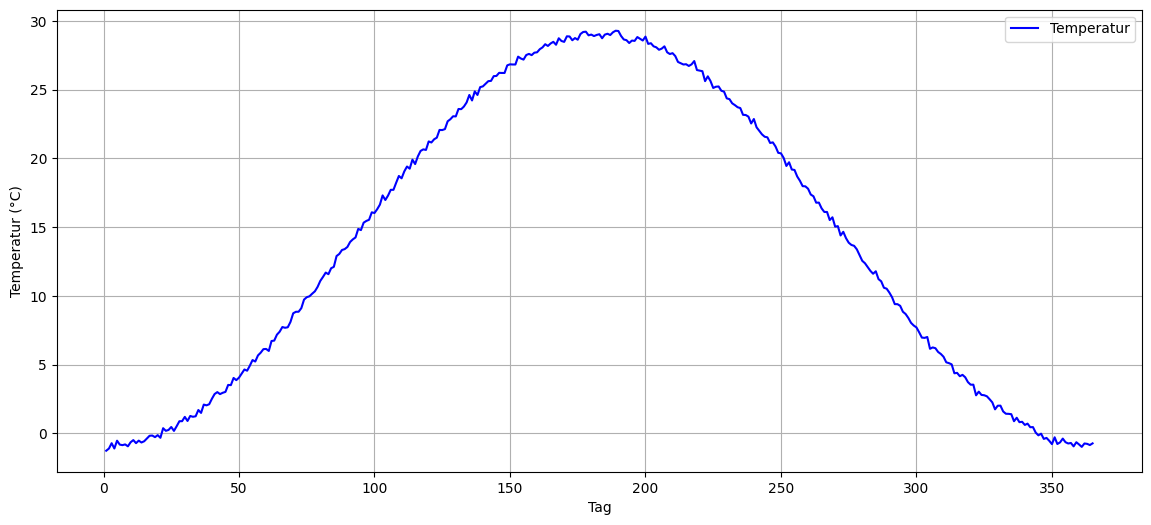

In [7]:
n = 100

total_revenue = []
total_profit= []
mean_revenue = []
mean_profit = []
temperaturen = []

for _ in range(n):
    hot_year = np.random.choice([True, False])
    temp_var = np.random.randint(1, 5)
    temp = Temperature(hot_year=hot_year, temp_var=temp_var).calculate_temperature()
    df = EisdielenGeschäft(temperaturen=temp).run_modell()
    
    profit, revenue, temperature = df['Profit/Loss'], df['Gesamtumsatz'], df['Temperatur']
    total_profit.append(sum(profit))
    total_revenue.append(sum(revenue))
    mean_revenue.append(revenue)
    mean_profit.append(profit)
    temperaturen.append(temperature)
    
print("Durchschnittlicher Profit [€]: ", np.mean(total_profit).round(2))
print("Durchschnittlicher Umsatz [€]: ", np.mean(total_revenue).round(2))

days = np.arange(1, 366)
mean_revenue = np.mean(mean_revenue, axis=0)
mean_profit = np.mean(mean_profit, axis=0)
mean_temperaturen = np.mean(temperaturen, axis=0)

plt.figure(figsize=(14, 6))
plt.plot(days, mean_revenue, label='Revenue', color='blue')
plt.plot(days, mean_profit, label='Profit', color='red')
plt.xlabel('Tag')
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(14, 6))
plt.plot(days, mean_temperaturen, label='Temperatur', color='blue')
plt.xlabel('Tag')
plt.ylabel('Temperatur (°C)')
plt.grid()
plt.legend()
plt.show()